In [79]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [80]:
fruits = pd.read_table('fruit_data.txt')

In [81]:
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [82]:
fruits.shape

(59, 7)

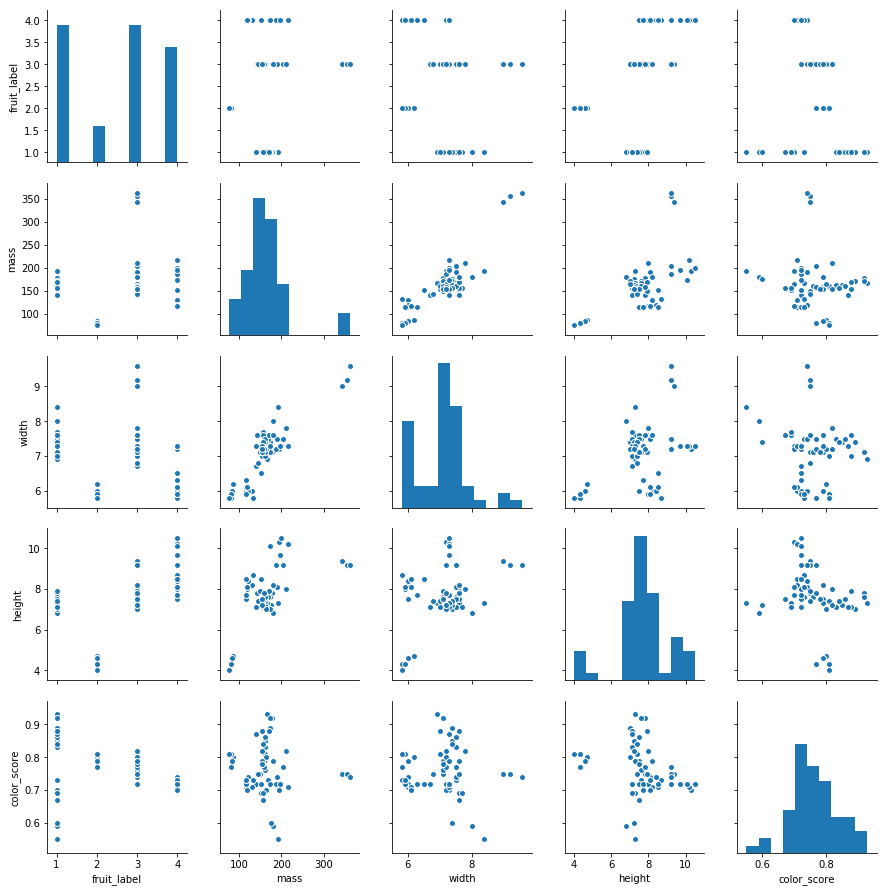

In [83]:
sns.pairplot(fruits)

In [84]:
from matplotlib import cm

X = fruits[['height', 'width', 'mass', 'color_score']]
y = fruits['fruit_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# cmap = cm.get_cmap('gnuplot')
# scatter = pd.scatter_matrix(X_train, c= y_train, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap=cmap)

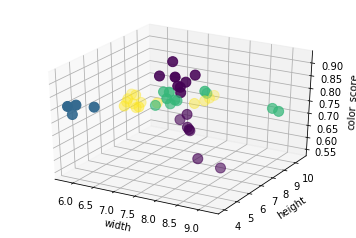

In [85]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(X_train['width'], X_train['height'], X_train['color_score'],  c=y_train, marker='o', s=100)
ax.set_xlabel("width")
ax.set_ylabel("height")
ax.set_zlabel("color_score")
plt.show()


**knn means intance based or memory based**

# the K-Nearest Neighbour Classifier Algorithm

**given a train set X_train with label y_tran and**
**given a new instance X_test to be classified**


*1. find the most similar instance (let's call them X_NN) to x_test that are in X_train* 
<br>
*2. Get the label y_NN for the instance in X_NN*
<br>
*3. Predict the label for X_test by combing the label y_NN*
<br>
*e.g. simple majority vote*


# A nearest neighbour algorithm needs four  thing specified

**1. A distance metric**
<br>
**2. How many nearest neighbour at loot at it**
<br>
**3. Optionla Weighting function on the neighbour points**
<br>
**4. Method for aggregatiing the classes of neighbour points**

In [86]:
lookup_fruit_name = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))

In [87]:
lookup_fruit_name


{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

## Create train_test split

In [88]:
X=fruits[['mass', 'width', 'height']]
y=fruits['fruit_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# create classifier object

In [89]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

# train the classifier(fit the estimator ) using the training data

In [90]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [91]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [92]:
knn.score(X_test, y_test)

0.5333333333333333

In [93]:
fruit_prediction = knn.predict([[20, 4.3, 5.5]])
lookup_fruit_name[fruit_prediction[0]]

'mandarin'

In [94]:
fruit_prediction = knn.predict([[200, 6.3, 8.5]])
lookup_fruit_name[fruit_prediction[0]]

'orange'

In [95]:
pred = knn.predict(X_test)
cm = confusion_matrix(y_test,pred )
cr = classification_report(y_test,pred)

In [96]:
print(cm)
print("*"*40)
print(cr)

[[3 0 0 1]
 [0 1 0 0]
 [3 0 3 2]
 [0 0 1 1]]
****************************************
             precision    recall  f1-score   support

          1       0.50      0.75      0.60         4
          2       1.00      1.00      1.00         1
          3       0.75      0.38      0.50         8
          4       0.25      0.50      0.33         2

avg / total       0.63      0.53      0.54        15



In [97]:
from adspy_shared_utilities import plot_fruit_knn

C:\Users\AYUSH SHARMA\Documents\Jupyter notebook\adspy_shared_utilities.py:184: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X_mat = X[['height', 'width']].as_matrix()
C:\Users\AYUSH SHARMA\Documents\Jupyter notebook\adspy_shared_utilities.py:185: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  y_mat = y.as_matrix()


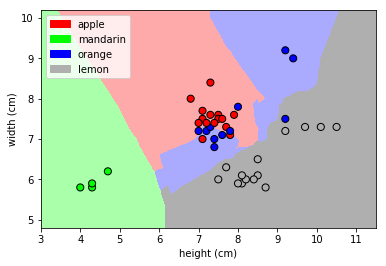

In [98]:
plot_fruit_knn(X_train, y_train, 5, "uniform")